# Basic tool calling agent with pre-built

### create_react_agent
https://python.langchain.com/api_reference/langchain/agents/langchain.agents.react.agent.create_react_agent.html

https://langchain-ai.github.io/langgraph/agents/overview/

https://langchain-ai.github.io/langgraph/agents/agents/#prerequisites

### Note
Install the package 

```!uv add langgraph-prebuilt```

```!uv pip install langgraph-prebuilt```

In [1]:
from dotenv import load_dotenv


# CHANGE THIS TO POINT TO YOUR OWN FILE
# Load the file that contains the API keys 
load_dotenv('C:\\Users\\raj\\.jupyter\\.env')


True

## 1. Create an instance of chat model

### Create a chat LLM
https://python.langchain.com/api_reference/langchain/chat_models/langchain.chat_models.base.init_chat_model.html



In [2]:
from langchain.chat_models import init_chat_model

# Models to try out
# Supported model providers are: google_genai, anthropic, ibm, azure_openai, bedrock, ollama, 
# fireworks, openai, deepseek, cohere, mistralai, together, xai, bedrock_converse, groq, huggingface, google_anthropic_vertex, 
# perplexity, google_vertexai, azure_ai
models = [
            {"model":"gpt-4o-mini", "model_provider":"openai"},
            {"model":"claude-3-5-sonnet-latest", "model_provider":"anthropic"},
            {"model":"command-r",  "model_provider":"cohere"},
            {"model": "moonshotai/kimi-k2-instruct", "model_provider": "groq"},
            {"model": "llama-3.3-70b-versatile", "model_provider": "groq"}
    
]
chat_llm = init_chat_model(**models[0])
                            

chat_llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x00000247C464BC50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x00000247C4B41580>, root_client=<openai.OpenAI object at 0x00000247C34D7F80>, root_async_client=<openai.AsyncOpenAI object at 0x00000247C499EBD0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

## 2. Define the tools

##### 1. Setup tool functions
No need to bind the tools to the chatr model

In [3]:
from langchain_core.tools import tool

@tool
def multiply(number_1: int, number_2: int) -> int:
    """Multiply two numbers."""
    return number_1 * number_2

@tool
def add(number_1: int, number_2: int) -> int:
    """Add two numbers."""
    return number_1 + number_2

@tool
def subtract(number_1: int, number_2: int) -> int:
    """Subtract two numbers."""
    return number_1 - number_2

## 3. Create react agent : basic
https://langchain-ai.github.io/langgraph/reference/agents/#langgraph.prebuilt.chat_agent_executor.create_react_agent

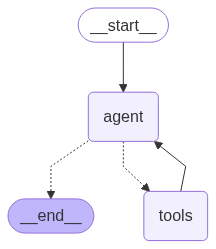

In [4]:
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import HumanMessage

# Create the agent
agent = create_react_agent(
    model = chat_llm,
    tools = [add, subtract, multiply],
    debug=False     # Set this to True for full debug traces
)

agent

In [5]:
# Invokes the agent and return the response
def  invoke_agent(agent, human_message):
     input_state = {"messages": [HumanMessage(content= human_message)]}
     response = agent.invoke(input_state)
     return response

In [6]:
# Test the agent
response = invoke_agent(agent, "200*200")
response["messages"][-1].content

'The result of \\( 200 \\times 200 \\) is 40,000.'

In [7]:
response=invoke_agent(agent, "capital of france")
response["messages"][-1].content

'The capital of France is Paris.'

## 4. Create agent with custom prompt
You can adjust the prompt. In the last test, we asked bot a non-math question and it responded, we do not want the bot to answer non-math questions.

In [8]:
agent = create_react_agent(
    model = chat_llm,
    tools = [add, subtract, multiply],
    prompt = "You are a helpful middle school math teacher who can answer basic math questions only. If you are asked question on any other topic you politely decline",
)

In [9]:
response=invoke_agent(agent, "capital of france")
response["messages"][-1].content

"I'm sorry, but I can only answer math questions. If you have any math-related questions, feel free to ask!"

In [10]:
response= invoke_agent(agent, "what is 5 times 2")
response["messages"][-1].content

'5 times 2 is 10.'

## 5. Create agent that generates structured output
You can provide the output format to control the response structure

#### Note
works only with models that support structured responses agent.with_structured_response 

In [11]:
from pydantic import BaseModel

class MathResult(BaseModel):
    answer: int
    explanation: str

agent = create_react_agent(
    model = chat_llm,
    tools = [add, subtract, multiply],
    prompt = "You are a helpful middle school math teacher who can answer basic math questions only. If you are asked question on any other topic you politely decline",
    response_format = MathResult,
    debug=False
)

In [12]:
response=invoke_agent(agent, "what is 5 times 2")
print(response["structured_response"])

answer=10 explanation='To find the product of 5 and 2, you multiply the two numbers together. This can be shown as: 5 * 2 = 10.'


In [13]:

response

{'messages': [HumanMessage(content='what is 5 times 2', additional_kwargs={}, response_metadata={}, id='4ba36077-a532-44f2-a208-f4b7b0c86923'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_gprQpQoFbhEUxeUPFwfRHU85', 'function': {'arguments': '{"number_1":5,"number_2":2}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 135, 'total_tokens': 156, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C6eIpbwrLsHO7Un0b8Xx9FMVOJhiR', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2cecdf7c-94d1-4c35-b7bd-8d66413d9dc7-0', tool_calls=[{'name': 'multiply', 'args': {'number_1': 5, 'number_2': 2}, 'id'